In [2]:
import pandas as pd
import numpy as np


In [3]:
wine_df=pd.read_csv(r"/Users/siddhant/Downloads/winequality-red.csv")

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing values in the dataset as we can see quality has discrete value we need to convert it to binary


In [6]:
# Convert the target variable 'quality' into binary classification
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

Here 
0=Bad quality

1= Good Quality

In [7]:
wine_df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

**NOTE:-** Target variable is imbalanced

In [30]:
wine_df.drop(columns=['quality']).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


**Descriptive Stats Observations:-**

1)In fixed acidity column standard deviation is less indicating that majority of the data point is around mean. 50 % of the data is around 7.90.Central tendancy is around 8.3 and 15.9 seems to be outlier.

**2)Volatile Acidity :-** mean is around 0.52 and stdev is less indicating the data points are not spread out .

in case of citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide	standard deviation is too high indicating there might be outliers making it right skewed for further investigation we have to visualise the columns.

so the preliminary observations are fixed acidity, volatile acidity,citric acid might be tightly distributed for the rest of the features datapoints are spread out and features may contain outliers.
    

In [31]:
wine_df["fixed acidity"].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

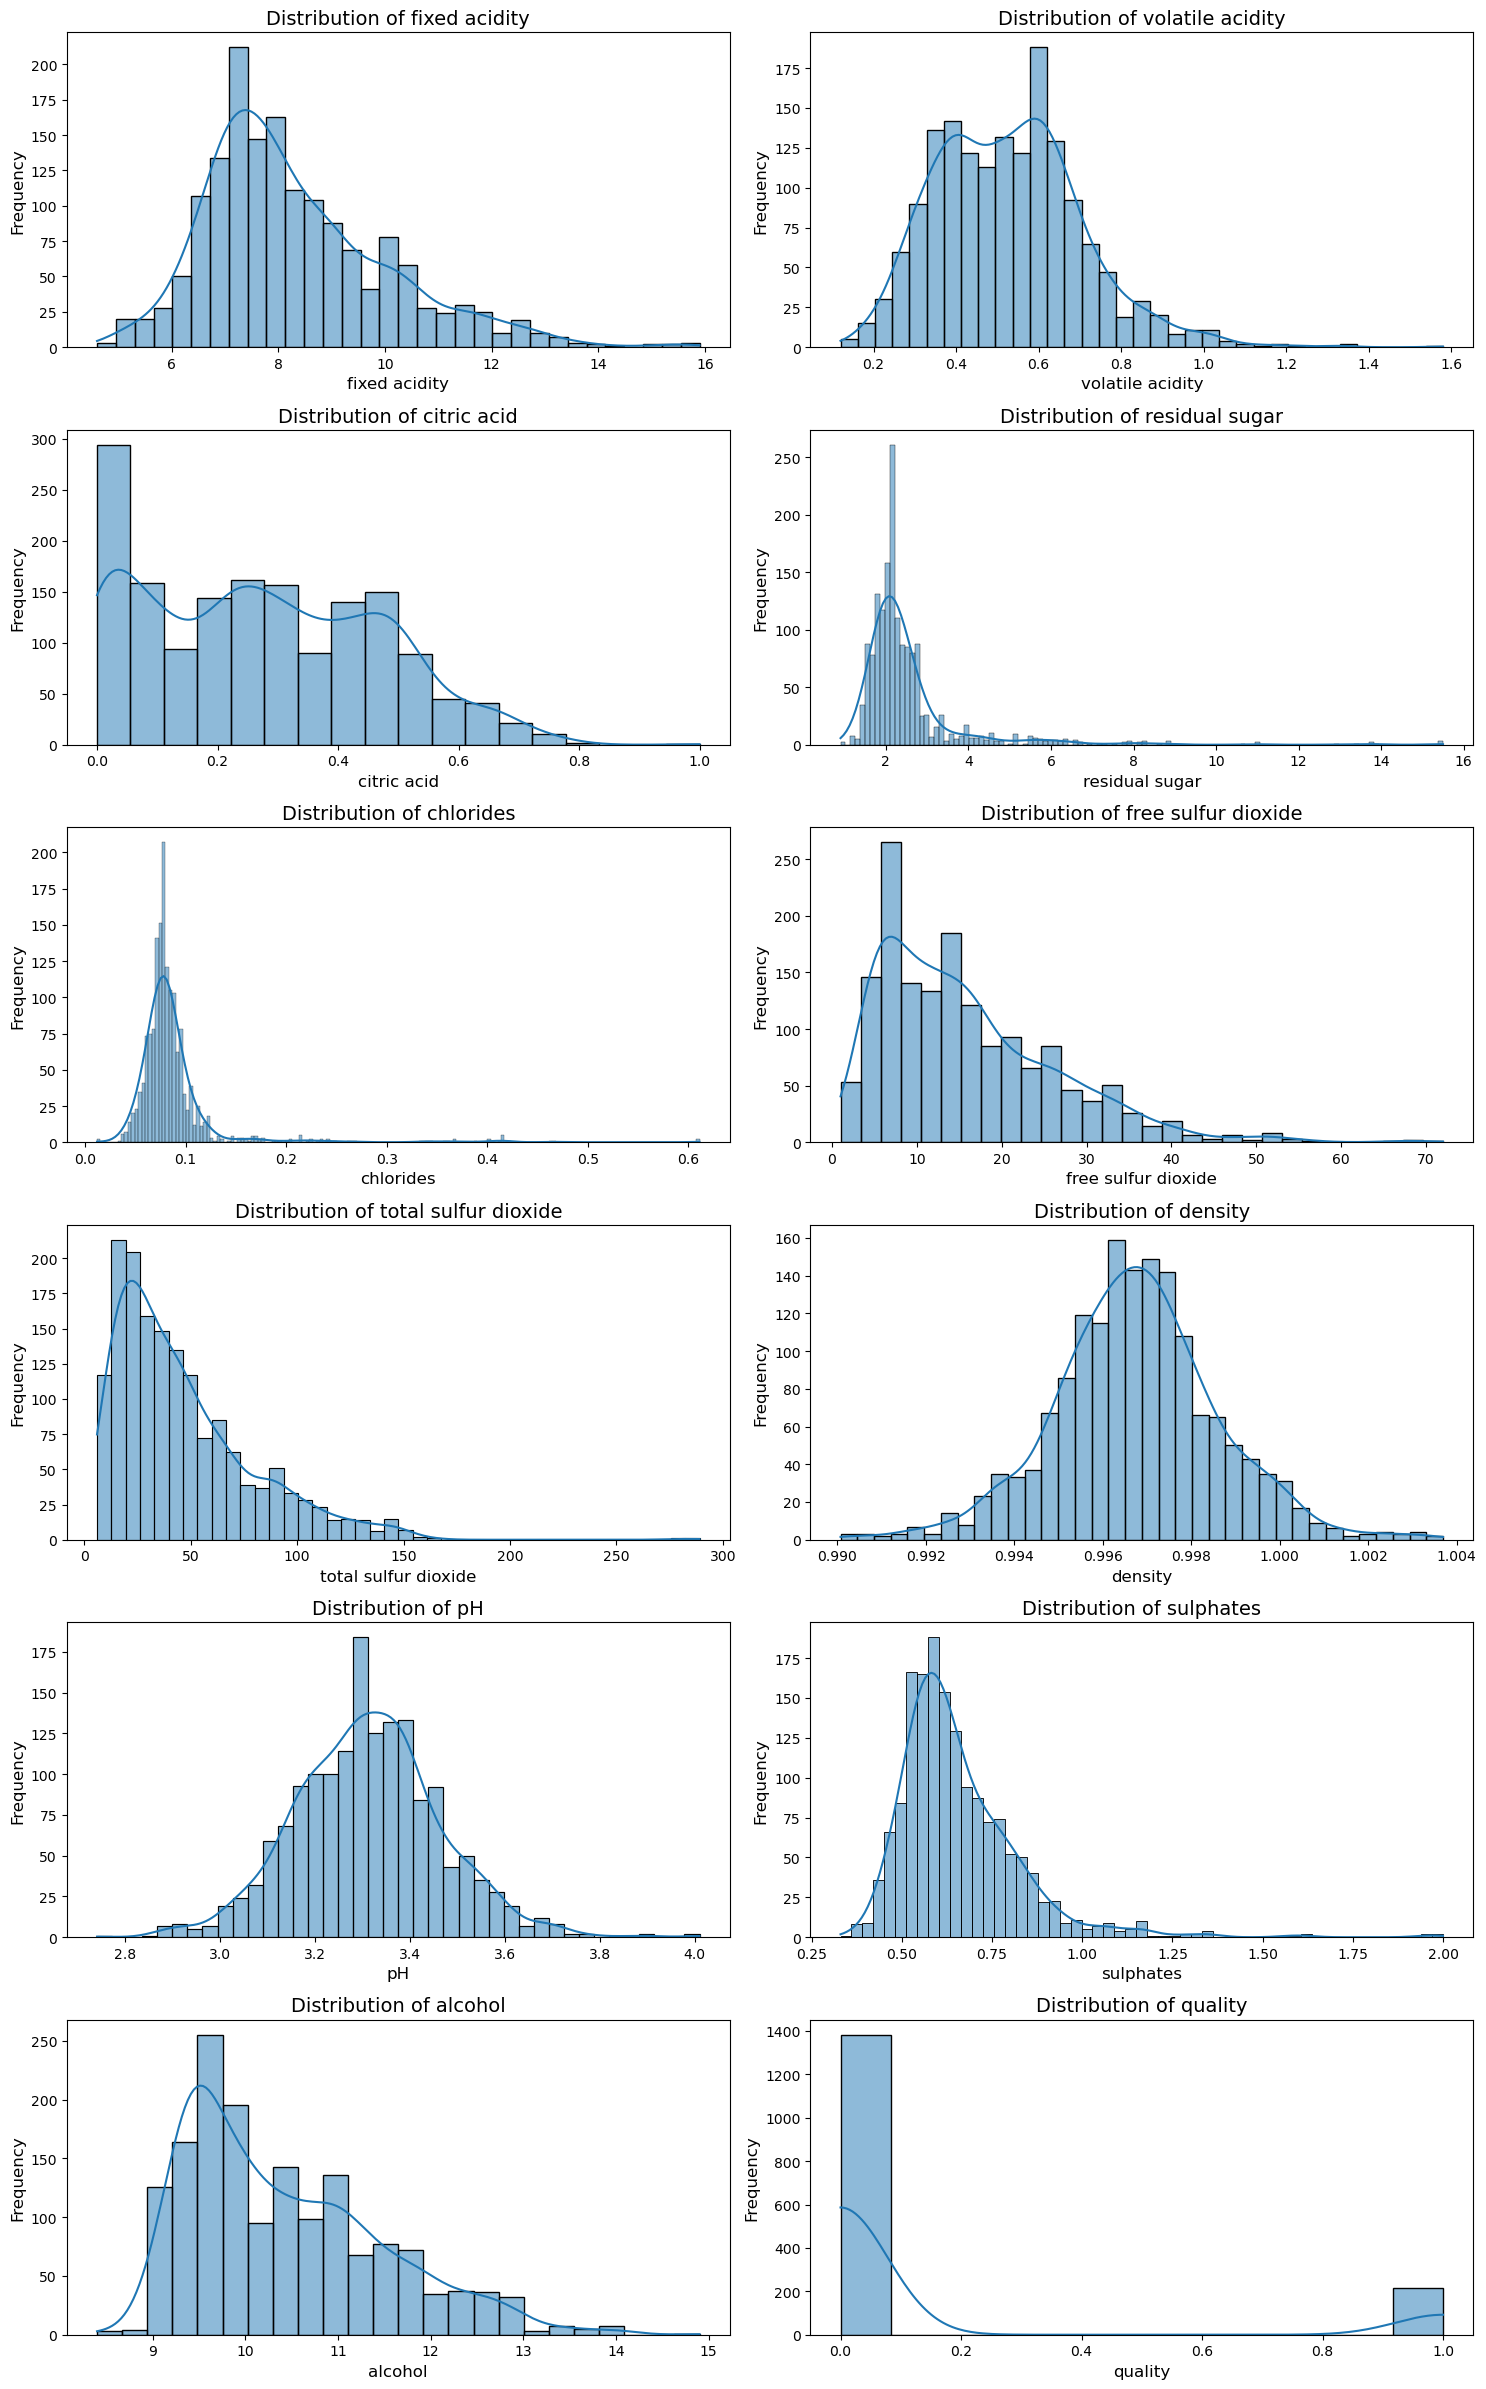

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
data = wine_df

# Set the number of columns for the subplot grid
num_cols = 2

# Determine the number of rows required for the subplot grid
num_rows = len(data.columns) // num_cols + (len(data.columns) % num_cols > 0)

# Set up the matplotlib figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate through the DataFrame columns and create a distribution plot for each feature
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}', fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

# Remove any extra subplots (if any)
for i in range(len(data.columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


**Observations

**1.Fixed Acidity:-** 
fixed acidity of 15.9 in red wine is extremely rare. The typical range of fixed acidity in red wine is between 4 and 10 grams per liter. A fixed acidity of 15.9 grams per liter is more than 4 standard deviations above the mean, which makes it a very significant outlier.

**2.Volatile Acidity:-** 
According to domain knowledge, a volatile acidity of 1.58 in red wine is extremely rare. The typical range of volatile acidity in red wine is between 0.1 and 0.7 grams per liter. A volatile acidity of 1.58 grams per liter is more than 4 standard deviations above the mean, which makes it a very significant outlier.

**3.Citric Acid:-**
The minimum value of citric acid in red wine is 0. Citric acid is a naturally occurring acid in grapes, and it is essential for the flavor and structure of wine.According to my analysis i will consider this an outlier.

**4.residual sugar:-** It is a very high residual sugar content for a red wine but is not uncomman content of residual sugar depend ontype of wine so i will be keeping this data point.

**5.chloride:-**  removing the outlier in this case.

**6.sulphar dioxide:-** 72 is outlier as the content is too high gonna remove it.






In [9]:
data=wine_df

In [10]:
import pandas as pd



# List of features to check for max values
features_to_check_max = ['fixed acidity', 'volatile acidity', 'free sulfur dioxide']

# Iterate through the list of features and remove the row(s) containing the max value for each feature
for feature in features_to_check_max:
    max_value = data[feature].max()  # Find the max value for the current feature
    data = data[data[feature] != max_value]  # Keep only the rows where the feature value is not equal to the max value

# For citric acid, remove the row(s) containing the min value
min_value_citric_acid = data['citric acid'].min()
data = data[data['citric acid'] != min_value_citric_acid]

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Now the data should be free of the rows containing the max values of the specified features, 
# and the min value of the citric acid feature


In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
3,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
4,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


# Feature Engineering

We can do some feature engineering to create additional features.

**1.fixed acidity /volatile acidity:**	we can take the ratio of fixed acidity to volatile acidity. This ratio can be used to assess the quality of a wine. A high ratio of fixed acidity to volatile acidity indicates a well-balanced wine with good aging potential. A low ratio of fixed acidity to volatile acidity indicates a wine that may be spoiled or have a vinegar-like taste. So i will replace fixed acidity and volatile acidity with ratio.

**2.Total acidity** :- is the sum of fixed and volatile acidity which could be an important factor affecting the taste and quality of the wine.

**3.The ratio of free sulfur dioxide to total sulfur dioxide**: This might be indicative of the wine's antioxidant and preservative potential.

**4.Alcohol to Density Ratio:** The ratio of alcohol to density could be indicative of the wine's body and mouthfeel, which can affect its quality.

**5.A sweetness index**: This could be created based on the residual sugar content. Higher residual sugar could lead to a sweeter wine, which might appeal to certain taste preferences.


**The pH level**:- can be a direct indicator of sourness/tartness which can impact the wine's flavor profile.




In [13]:
data['acidity_ratio'] = data['fixed acidity'] / data['volatile acidity']
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']
data['sulfur_dioxide_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']
data['alcohol_to_density_ratio'] = data['alcohol'] / data['density']
# Assuming a threshold, e.g., residual sugar content greater than 3 grams per liter is considered sweet
data['sweetness'] = data['residual sugar'].apply(lambda x: 'Sweet' if x > 3 else 'Dry')
# You could categorize the pH levels
data['sourness'] = data['pH'].apply(lambda x: 'High' if x > 3.5 else ('Medium' if x > 3 else 'Low'))


In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity_ratio,total_acidity,sulfur_dioxide_ratio,alcohol_to_density_ratio,sweetness,sourness
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,10.263158,8.56,0.277778,9.829488,Dry,Medium
1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,40.000000,11.48,0.283333,9.819639,Dry,Medium
2,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,13.166667,8.50,0.254237,9.433962,Dry,Medium
3,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,13.448276,8.38,0.500000,9.530498,Dry,Medium
4,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0,15.000000,8.00,0.166667,10.523151,Sweet,Medium


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the 'sweetness' and 'sourness' columns
data['sweetness'] = le.fit_transform(data['sweetness'])

In [17]:
from sklearn.preprocessing import LabelEncoder

# Manually specify the order of your categories
#sweetness_order = ['Dry', 'Sweet']
sourness_order = ['Low', 'Medium', 'High']

# Create a mapping of category to integer based on your specified order
#sweetness_mapping = {category: idx for idx, category in enumerate(sweetness_order)}
sourness_mapping = {category: idx for idx, category in enumerate(sourness_order)}

# Apply the mapping to your data
#data['sweetness'] = data['sweetness'].map(sweetness_mapping)
data['sourness'] = data['sourness'].map(sourness_mapping)

# Now 'sweetness' and 'sourness' columns have been encoded with integers representing the order of the categories


**SPLIT THE DATASET**

In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'quality' is your target variable
X = data.drop('quality', axis=1)  # Features (all columns except 'quality')
y = data['quality']  # Target variable

# Split the data into training and testing sets
# Common split ratios are 80-20 or 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training features and labels,
# and X_test and y_test are your testing features and labels.


In [56]:
data["quality"].value_counts()

0    1256
1     209
Name: quality, dtype: int64

**Since target variable is imbalanced we have to balance it with smote technique before training the model**

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
y_train_smote.value_counts()

0    1000
1    1000
Name: quality, dtype: int64

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = rf_classifier_2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8873720136518771
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       256
           1       0.54      0.68      0.60        37

    accuracy                           0.89       293
   macro avg       0.75      0.80      0.77       293
weighted avg       0.90      0.89      0.89       293



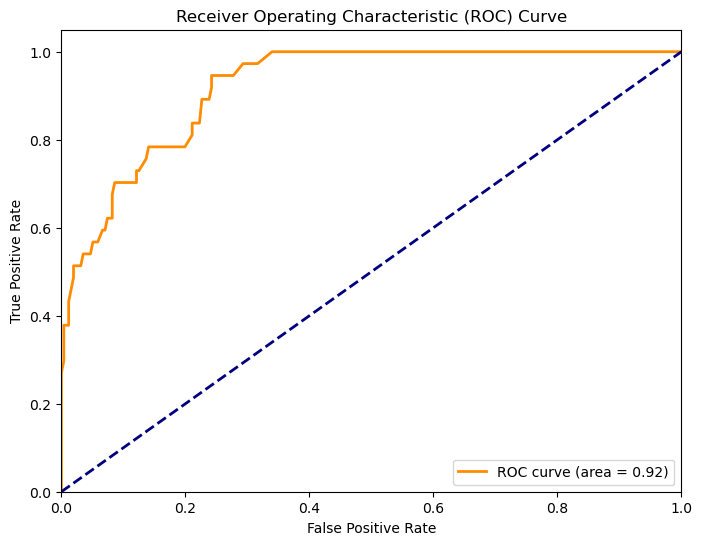

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rf_classifier_2 is your trained RandomForestClassifier
y_prob = rf_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your data
# Instantiate the classifier (you can use any model)
#rf_classifier = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean accuracy: {cv_scores.mean():.2f}")


Cross-validation scores: [0.88054608 0.84641638 0.89078498 0.83617747 0.8668942 ]
Mean accuracy: 0.86


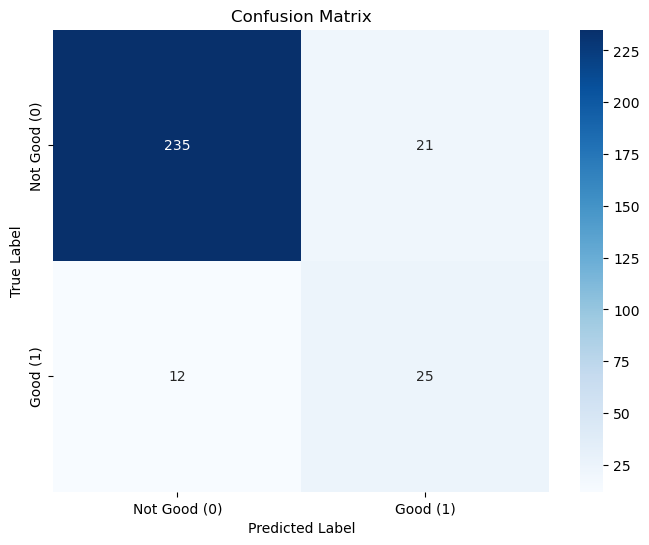

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good (0)', 'Good (1)'], yticklabels=['Not Good (0)', 'Good (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [76]:
feature_importances = rf_classifier.feature_importances_


In [77]:
feature_importance_dict = dict(zip(X_train.columns, feature_importances))


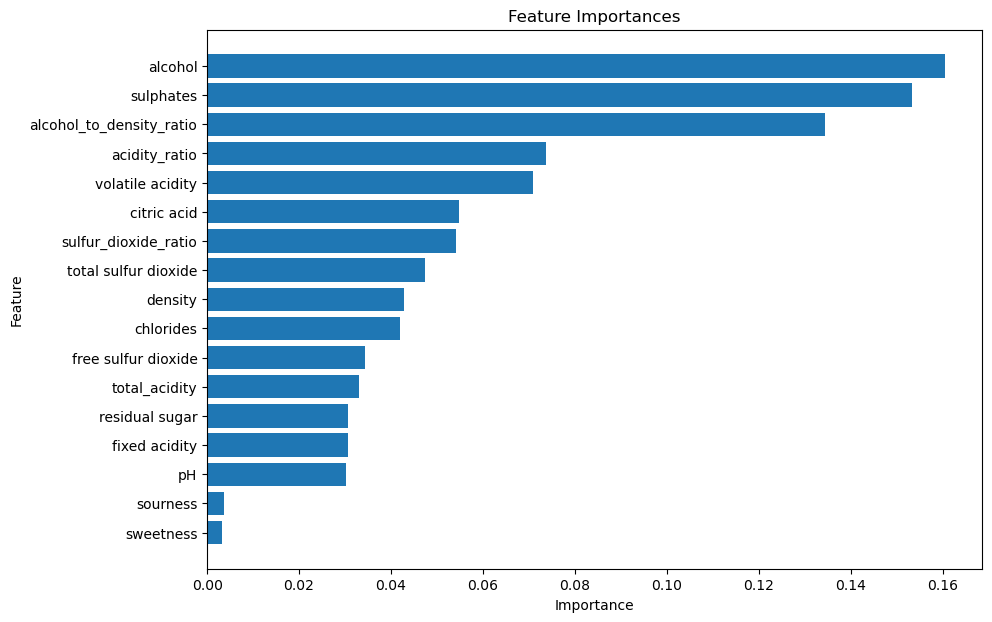

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [81]:
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance in decreasing order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or use the sorted DataFrame
feature_importance_df

,Feature,Importance
10,alcohol,0.160577
9,sulphates,0.153260
14,alcohol_to_density_ratio,0.134462
11,acidity_ratio,0.073626
1,volatile acidity,0.070988
2,citric acid,0.054806
13,sulfur_dioxide_ratio,0.054148
6,total sulfur dioxide,0.047338
7,density,0.042884
4,chlorides,0.041990


# **physiochemical properties make a wine 'good'**

**1.Alcohol Content:** It appears to be the most important feature in determining wine quality. This is consistent with common knowledge in the wine industry, where higher alcohol content can contribute to a richer and fuller-bodied taste.

**2.Sulphates:** The presence of sulphates comes next in terms of importance. Sulphates play a role in preserving the freshness and flavor of the wine.

**3.Alcohol to Density Ratio:** This derived feature, which is the ratio of alcohol content to density, is also significant. It suggests that the relationship between alcohol content and density is meaningful in predicting wine quality.

**4.Acidity Ratio:** This ratio could be an important indicator of wine quality. It might refer to the balance between fixed and volatile acidity, which is a crucial aspect of a wine's taste profile.

**5.Volatile Acidity and Citric Acid:** These two features are also significant. Volatile acidity can contribute to off-flavors if it's too high, while citric acid can enhance freshness and acidity in the wine.

**6.Sulfur Dioxide Ratios:** These ratios could indicate the balance of free and total sulfur dioxide, which is important for preserving the wine and preventing spoilage.

**7.Total Sulfur Dioxide, Density, and Chlorides:** These features contribute to the overall quality prediction, but to a slightly lesser extent compared to the aforementioned ones.

**8.pH, Residual Sugar, Fixed Acidity, Free Sulfur Dioxide, Total Acidity:** These features have relatively lower importance, but they still play a role in determining wine quality.

**9.Sweetness and Sourness:** These seem to have the least impact on the prediction of wine quality, according to the feature importances.

Overall, the model suggests that a combination of physicochemical properties, with a strong emphasis on alcohol content, sulphates, and derived ratios, is crucial in determining the quality of the wine. This aligns with the domain knowledge that certain chemical properties strongly influence the perceived quality of a wine.





